<a href="https://colab.research.google.com/github/iArtificialPeru/WranglingModeling/blob/main/Day%202%20-%20Notebooks/07%20Data%20Visualization%20(Seaborn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Data Visualization (Seaborn)

# Seaborn

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive/')

os.chdir('/content/drive/MyDrive/GitHub/WranglingModeling/Day 2 - Notebooks')
for item in os.listdir():
  print(item)

Mounted at /content/drive/
titanic.csv
grad_admit.csv
prof_ratings.csv
predict_grades.csv
diabetes.csv
heart-disease.csv
grad_admit_.csv
employee_attrition_.csv
job_promotion_.csv
06 Matplotlib - Exercise .ipynb
18  The Data Science Process - Exercise.ipynb
11 Feature Selection (Data Visualization).ipynb
10 Feature Selection - Most Important Features.ipynb
04 Data Transformation Exercise .ipynb
09 Project Exercise .ipynb
02 Imputation - Exercise .ipynb
02 Imputation - Exercise Solutions.ipynb
04 Data Transformation Exercise-Solutions.ipynb
06 Matplotlib - Exercise Solutions.ipynb
07 Data Visualization (Seaborn).ipynb
08 Algorithms Example.ipynb
09 Project Exercise- Solution.ipynb
12 Feature Extraction (PCA).ipynb
14 Saving a model (classification).ipynb
15 Loading a model to make predictions (classification).ipynb
13 Model evaluation walk through.ipynb
16 Saving a model (regression).ipynb
17 Loading a model to make predictions (regression).ipynb
18 The Data Science Process - Exercise S

In [3]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,chest_pain,rest_bp,chol,max_hr,st_depr,heart_disease
0,63,female,3,145,233,150,2.3,1
1,37,female,2,130,250,187,3.5,1
2,41,male,1,130,204,172,1.4,1
3,56,female,1,120,236,178,0.8,1
4,57,male,0,120,354,163,0.6,1


---

# Line Plot

The line plot aggregates over multiple y values at each value of x and shows an estimate of the mean and a 95% confidence interval for that estimate.

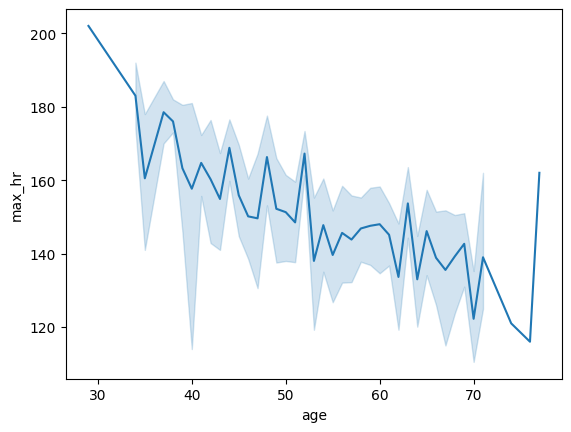

In [4]:
sns.lineplot(data=df, x="age", y="max_hr");

## Style by categorical feature

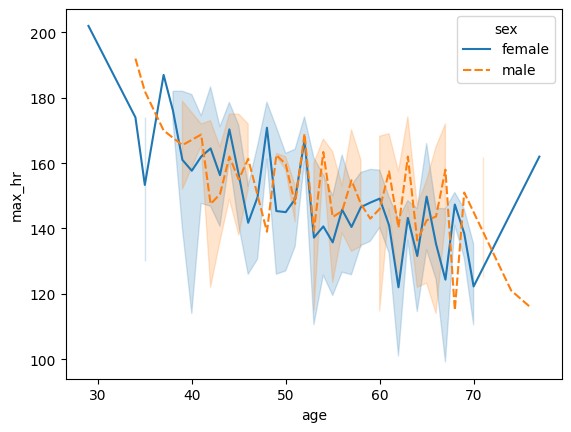

In [5]:
sns.lineplot(data=df, x="age", y="max_hr",
                      hue="sex", style="sex");

# Relation Plot
Enables the line plot to group using an additional categorical variable.

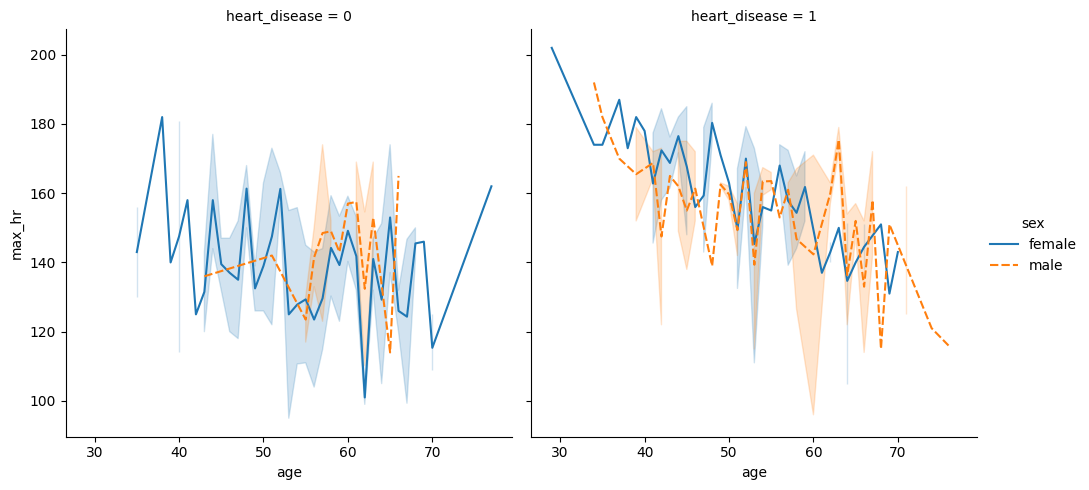

In [6]:
sns.relplot(data=df, x="age", y="max_hr",
                     hue="sex", style="sex",
                     kind="line", col="heart_disease");

---

# Setting the theme

## Set grid style
There are five preset styles: darkgrid (default), whitegrid, dark, white, ticks

In [7]:
sns.set_style("whitegrid")

#### Render plot with the above changes

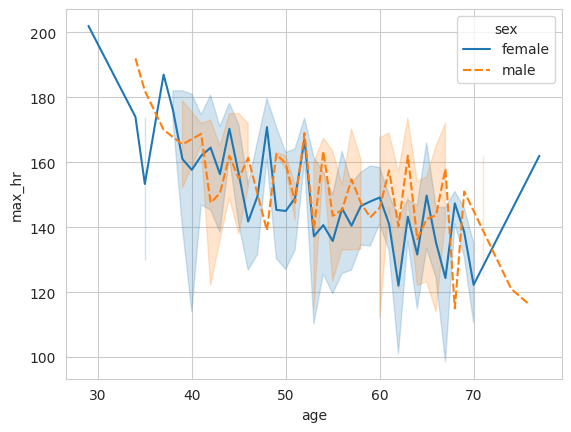

In [8]:
sns.lineplot(data=df, x="age", y="max_hr",
                      hue="sex", style="sex");

## Setting plot context
There are four preset contexts in order of relative size: paper, notebook (default), talk, poster.

In [9]:
sns.set_context("poster")

#### Render plot with the above changes

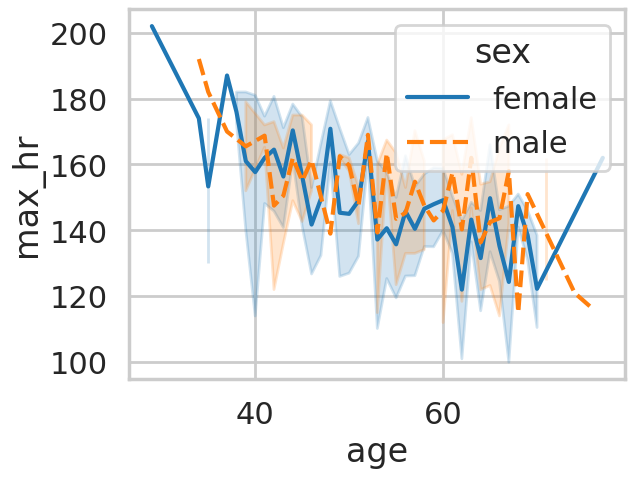

In [10]:
sns.lineplot(data=df, x="age", y="max_hr",
                      hue="sex", style="sex");

## Set colors by selecting a desired palette (color map)
https://matplotlib.org/stable/gallery/color/colormap_reference.html

Sample colormaps: Set1, Dark2, Accent, Pastel1, Reds, Greens, Blues

In [11]:
sns.set_palette("Set1")

#### Render plot with the above changes

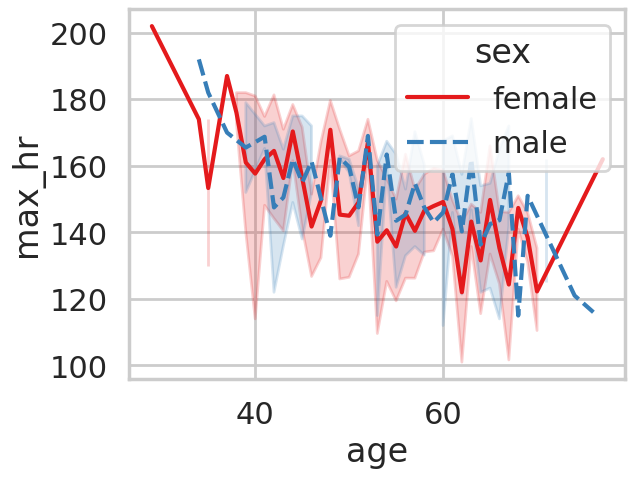

In [12]:
# whitegrid, poster, Set1

sns.lineplot(data=df, x="age", y="max_hr",
                      hue="sex", style="sex");

## Reset to the Seaborn defaults

style: darkgrid, context: notebook, palette: tab10

In [13]:
# darkgrid, notebook, tab10

sns.set_theme()

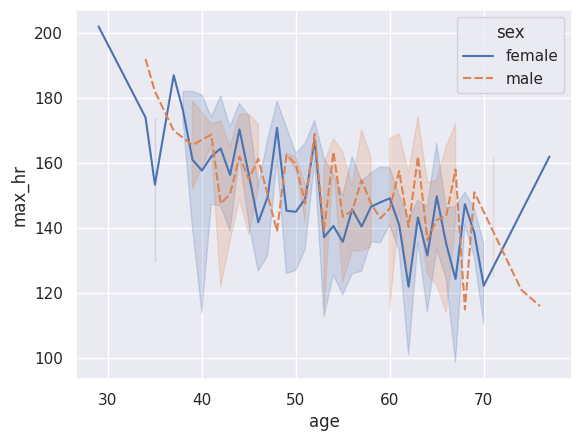

In [14]:
sns.lineplot(data=df, x="age", y="max_hr",
                      hue="sex", style="sex");

## Setting the theme enables customizing the style, context and colors together

In [15]:
sns.set_theme(style='white', context='talk', palette='Set1')

#### Render plot with the above changes

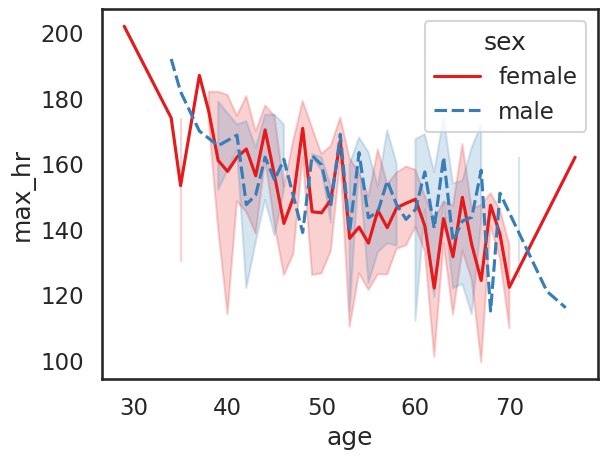

In [16]:
sns.lineplot(data=df, x="age", y="max_hr",
                      hue="sex", style="sex");

---

# Linear Regression Plot

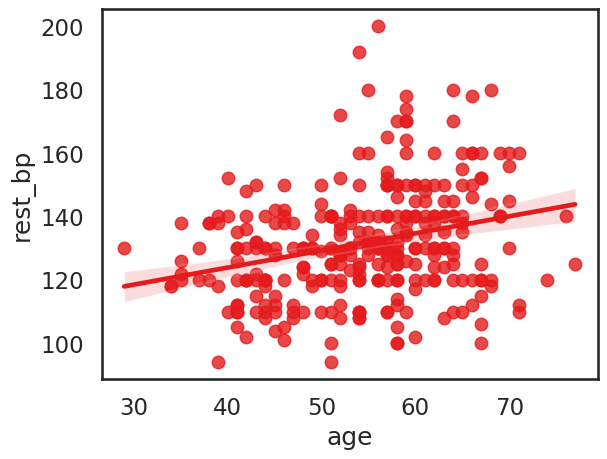

In [17]:
sns.regplot(data=df, x="age", y="rest_bp");

### Set the hue of the data points based on the "sex" column and adjust the figure size

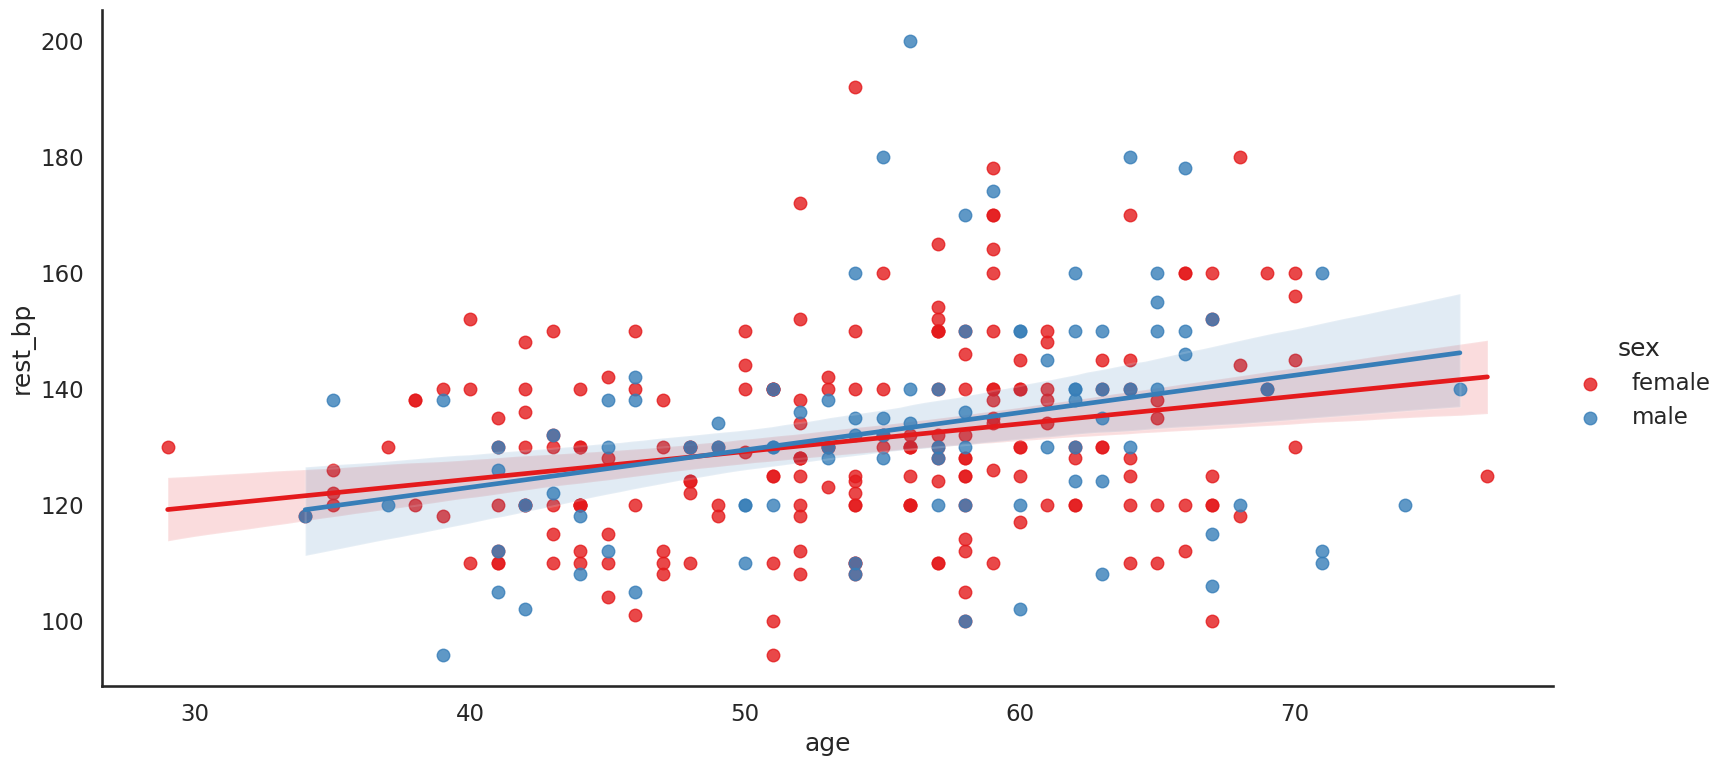

In [18]:
sns.lmplot(data=df, x="age", y="rest_bp",
           hue="sex", palette="Set1", height=8, aspect=2);
                        # The aspect here sets the width to be 2 times the height.

---

# Box Plot

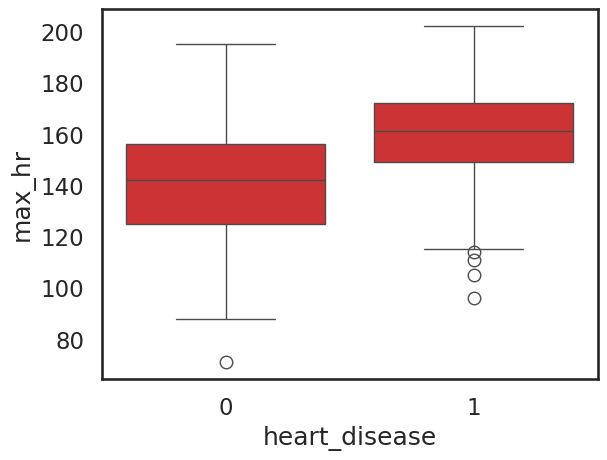

In [19]:
sns.boxplot(x=df["heart_disease"], y=df["max_hr"]);

---

# Density Plot

In [20]:
sns.set_theme(style='white', context='notebook', palette='Set1')

### Heart Disease by Female and Max HR

In [ ]:
fig, ax = plt.subplots()
ax.set(title="Females")

sns.kdeplot(data=df, x=df.loc[df["sex"] == "female", "max_hr"],
                 hue = "heart_disease", fill=True);

### Heart Disease by Male and Max HR

In [ ]:
fig, ax = plt.subplots()
ax.set(title="Males")

sns.kdeplot(data=df, x=df.loc[df["sex"] == "male", "max_hr"],
                 hue = "heart_disease", fill=True);

### Combine the plots and scale

In [ ]:
fig, (left, right) = plt.subplots(1,2, figsize=(15, 5))
left.set(title="Female")
right.set(title="Male")

sns.kdeplot(data=df, x=df.loc[df["sex"] == "female", "max_hr"],
                 hue = "heart_disease", fill=True, ax=left);

sns.kdeplot(data=df, x=df.loc[df["sex"] == "male", "max_hr"],
                 hue = "heart_disease", fill=True, ax=right);

# Scale the plots
#left.set_ylim((0, .0175));

---

# Joint Plot

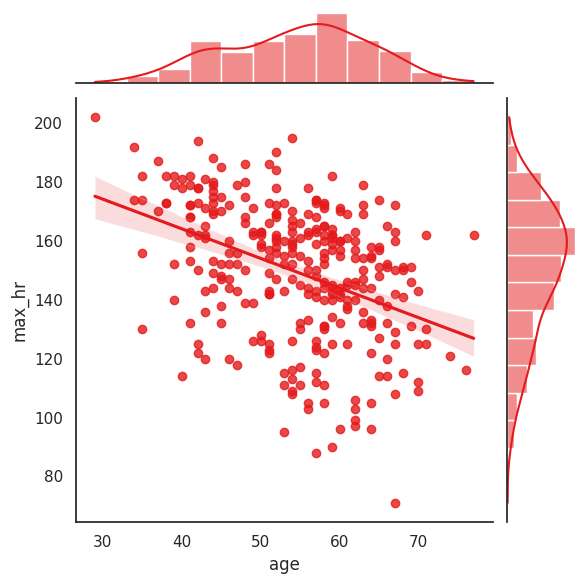

In [21]:
sns.jointplot(data=df, x="age", y="max_hr", kind="reg");

---

# Pair Plot

Pairwise feature comparisons

In [22]:
df.head()

,age,sex,chest_pain,rest_bp,chol,max_hr,st_depr,heart_disease
0,63,female,3,145,233,150,2.3,1
1,37,female,2,130,250,187,3.5,1
2,41,male,1,130,204,172,1.4,1
3,56,female,1,120,236,178,0.8,1
4,57,male,0,120,354,163,0.6,1


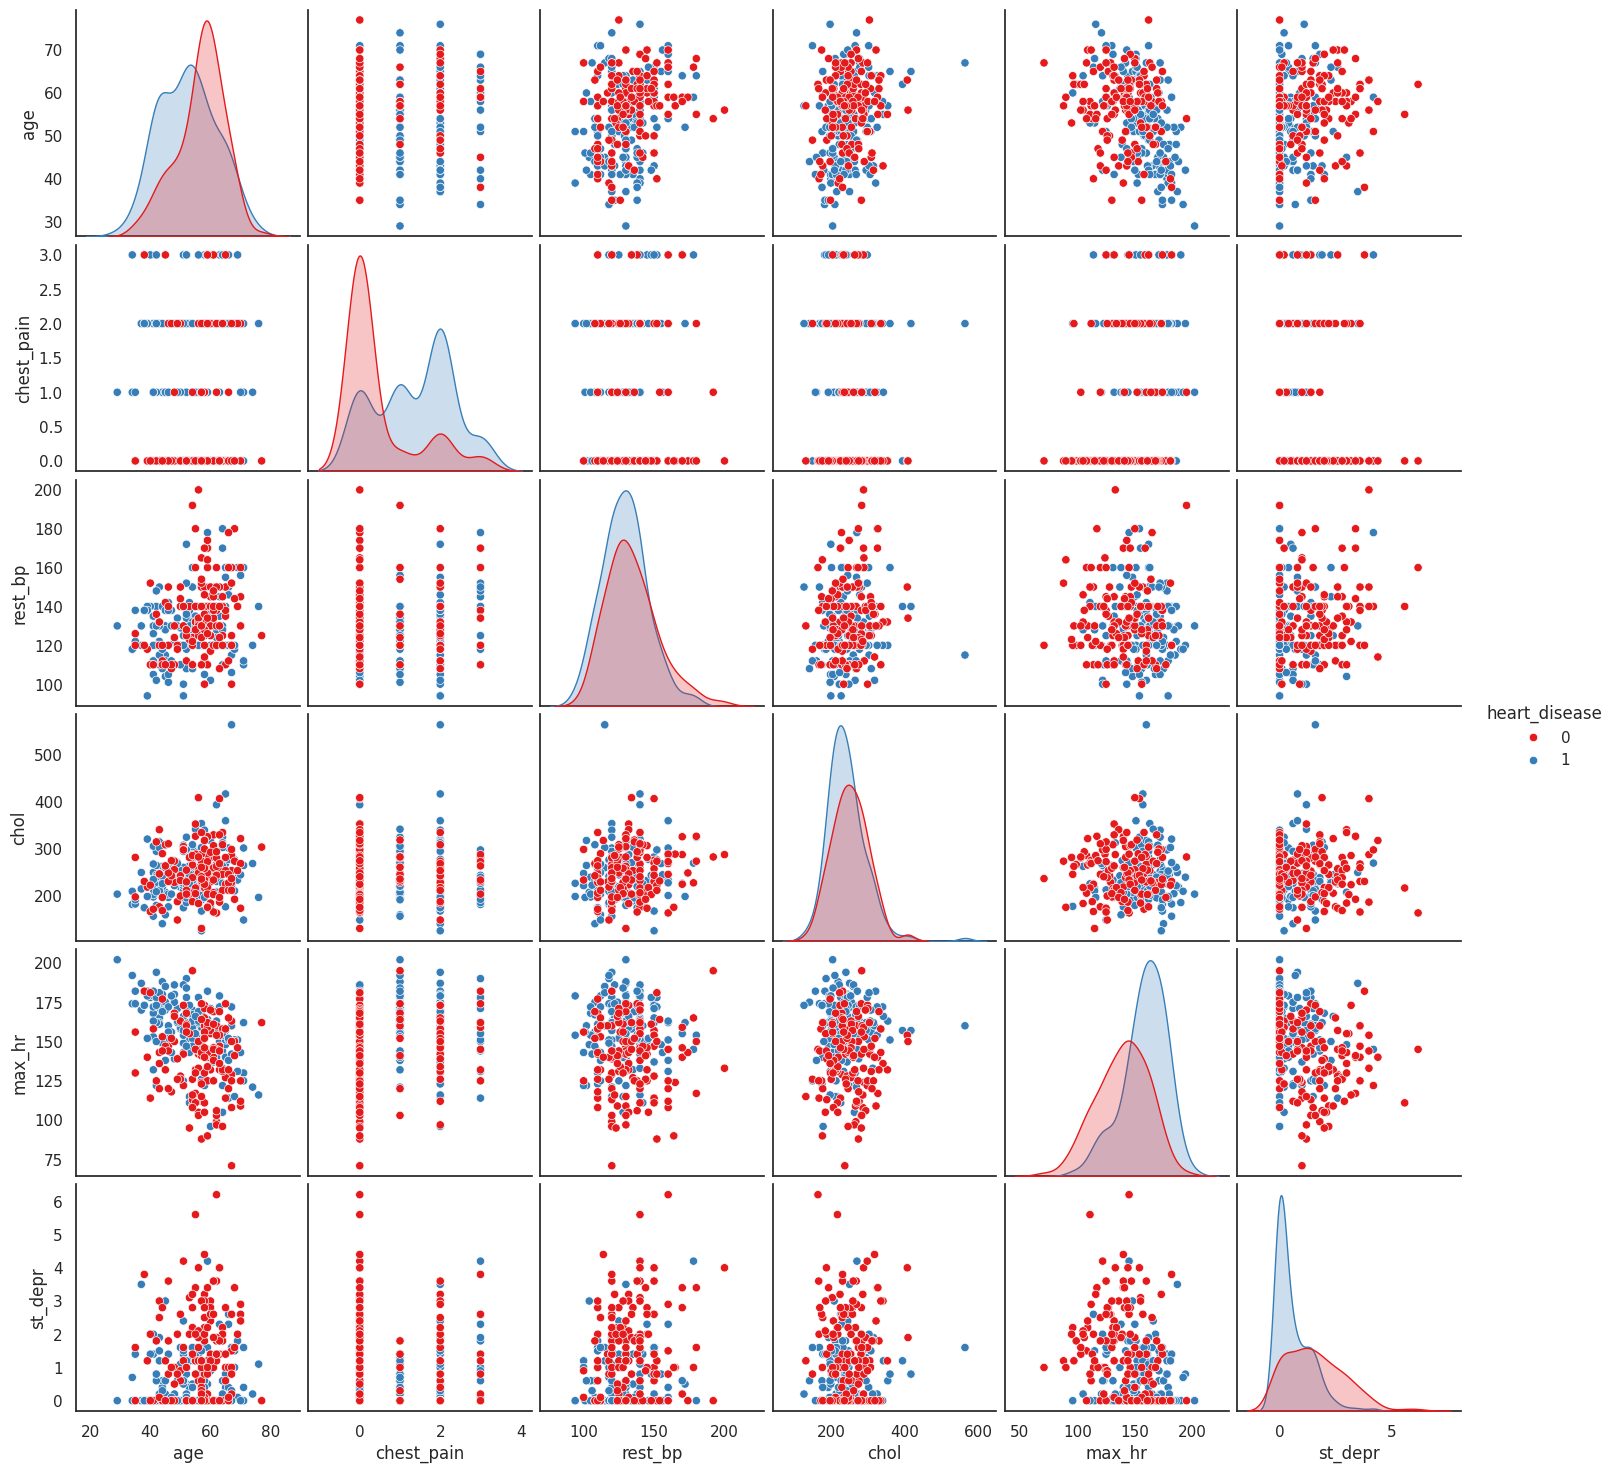

In [23]:
sns.pairplot(data=df, hue="heart_disease");

---